In [150]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [151]:
#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.now().strftime('%W')

risk_set_a = set(['1H','2H','3H'])
risk_set_b = set(['4H','5H','6V','7V','8H'])
risk_set_c = set(['9V','10V'])
risk_set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
risk_set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
risk_set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
risk_set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
risk_set_h = set(['74V','75H','76H','76V','77V'])
risk_set_i = set(['78V','79H','79V','80H'])


In [152]:
week_num

'19'

In [153]:
PRACTICE = 'All'
FOLDER = '/090518'

In [154]:
os.chdir(u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/'+PRACTICE+FOLDER)

In [155]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/All/090518'

In [156]:
iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

all_set = set()

all_set.update(iot_set)
all_set.update(cloud_set)
all_set.update(connectivity_set)
all_set.update(eit_set)
all_set.update(uc_set)


In [157]:
first = True
file_count = 0
product_id = 0

for filename in os.listdir(os.getcwd()):
    df = pd.read_excel(filename, sheet_name=None)
    
    file_count = file_count + 1
    
    sheet_names = df.keys()
    sheets = sheet_names[4:-1]

    print filename
    
    product_id = int(filename[11:14])
    print product_id
    all_set.remove(product_id)

    entity_count = len(sheets)
    print("Entity count: {0:d}".format(entity_count))
    
    for sh in sheets:
        print sh
        if sh == u'PII Data Record': #this is an odd bug!
            print "this is odd! PII Data"
            continue
        df[sh].insert(loc=0, column='Filename', value=filename)
        df[sh].insert(loc=1, column='Product ID', value=product_id)
        df[sh].drop(0, inplace=True)
        df[sh]['Response'].fillna('No Response', inplace=True)
        df[sh]['Remediation Project Ref'].fillna('No Response', inplace=True)
        df[sh]['Response Comments'].fillna('', inplace=True)
        df[sh]['Delivery Date'].fillna('', inplace=True)
        df[sh]['Compliance Assessment'].fillna('N/A', inplace=True)
        if first:
            out_df = df[sh][['Filename',\
                             'Product ID',\
                             'Req Ref',\
                             'Req nr',\
                             'Compliance Assessment',\
                             'Response',\
                             'Response Comments',\
                             'Delivery Date',\
                             'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            first = False
        else:
            cp_df = df[sh][['Filename',\
                            'Product ID',\
                            'Req Ref',\
                            'Req nr',\
                            'Compliance Assessment',\
                            'Response',\
                            'Response Comments',\
                            'Delivery Date',\
                            'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            out_df = pd.concat([out_df, cp_df], axis=0, ignore_index=True, copy=True)
            
print file_count

GDPR-RS-EPS072-VSDM-Airwatch-V5.0 RI RELEASED.xlsx
72
Entity count: 3
A - VSDM Console
B - Database
C - Miscellaneous
GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(09-05-2018).xlsx
59
Entity count: 1
A - Primary Storage
GDPR-RS-EPS054-Hosting Solution Management-V4.0 RELEASED.xlsx
54
Entity count: 1
A - AIM
GDPR-RS-EPS081-NI-S-Phase2-V5.0 RI RELEASED.xlsx
81
Entity count: 1
A - NIS Web Security
GDPR-RS-EPS024-Device Lifecycle Management-V4.0 RELEASED.xlsx
24
Entity count: 1
A - DLM
GDPR-RS-EPS147-PCI (Payment Card Industry)-V4.0 reviewed 9.05 IB.xlsx
147
Entity count: 1
A - PCI Services
GDPR-RS-EPS129-Service Now-V4.0 RELEASED.xlsx
129
Entity count: 1
A - Service Now
GDPR-RS-EPS127-EDM (Enterprise Data Mart)-V4.0 RELEASED.xlsx
127
Entity count: 1
A - EDM
GDPR-RS-EPS064-Total-Cloud-Flex-V4.1-REVIEWED-(09-05-2018).xlsx
64
Entity count: 1
A - Total Cloud Flex
GDPR-RS-EPS193a-OneNet Atos and Celfocus Clients-V4.0 RELEASED.xlsx
193
Entity count: 1
A - Client App
GDPR-RS-EPS029-IP-VPN--V4.2 

In [158]:
#missing products
all_set

set()

In [159]:
iot_set

{67, 68, 89, 90, 91, 94, 97, 101, 102, 103, 109, 110}

In [160]:
#out_df[out_df['Req Ref'].str.contains("EPS118-PCA-76V")]

#add product column
out_df['Product Ref'] = out_df['Req Ref'].str.slice(0, -2)

out_df['Product ID'] = out_df['Req Ref'].str.slice(3, 6)

out_df['Category'] = out_df['Req Ref'].str.slice(7, 10)

out_df['Category'].replace('-PC', 'PCA', inplace=True)
out_df['Category'].replace('-SC', 'SCA', inplace=True)

#out_df.drop_duplicates(['Product Ref'], keep='first', inplace=True)

mapping = {'No Response':'No Project Code'}

out_df['Orphan'] = out_df['Remediation Project Ref'].map(lambda x: mapping.get(x, 'Project Code Allocated'))

#out_df[out_df['Product ID'] == '022'].head(50)
#out_df.head()

In [161]:
def return_practice( prod_id ):
    #print int(prod_id)
    if int(prod_id) in iot_set:
        return 'IoT'
    elif int(prod_id) in cloud_set:
        return 'Cloud'
    elif int(prod_id) in connectivity_set:
        return 'Connectivity'
    elif int(prod_id) in eit_set:
        return 'EIT'
    elif int(prod_id) in uc_set:
        return 'UC'
    else:
        print "Unknown Practice"
        return 'Unknown Practice'

out_df['Product ID'].dropna(inplace=True)    
    
out_df['Practice'] = out_df['Product ID'].map(lambda x: return_practice(x))

In [162]:
def return_risk_set( req_id ):
    if req_id in risk_set_a:
        return 'A'
    elif req_id in risk_set_b:
        return 'B'
    elif req_id in risk_set_c:
        return 'C'
    elif req_id in risk_set_d:
        return 'D'
    elif req_id in risk_set_e:
        return 'E'
    elif req_id in risk_set_f:
        return 'F'
    elif req_id in risk_set_g:
        return 'G'
    elif req_id in risk_set_h:
        return 'H'
    elif req_id in risk_set_i:
        return 'I'
    else:
        return 'UNKNOWN'
    
out_df['Risk Category'] = out_df['Req nr'].map(lambda x: return_risk_set(x))

    

In [163]:
out_df['Approved by DPO:'] = ""
out_df['If Approved, change to ?'] = ""
out_df['New Comment to be inserted into RS and DPIA'] = ""

In [164]:
#FIXME: Bug!
out_df['Product ID'].fillna('dropme',inplace=True)

out_df = out_df[out_df['Product ID'] != 'dropme'].copy()


In [165]:
#out_df[out_df['Filename']=='GDPR-RS-EPS103-SmartCities-V4.1 REVIEWED 020518 (1).xlsx']

In [166]:
output_writer = pd.ExcelWriter('../'+PRACTICE+'-REMEDIATION-STATS-Week'+week_num+'-'+today+'.xlsx')
out_df.to_excel(output_writer, 'REMEDIATION STATS')
output_writer.save()

Text(0.5,1,'Chart to show all requirements and their response types: All 10-05-2018')

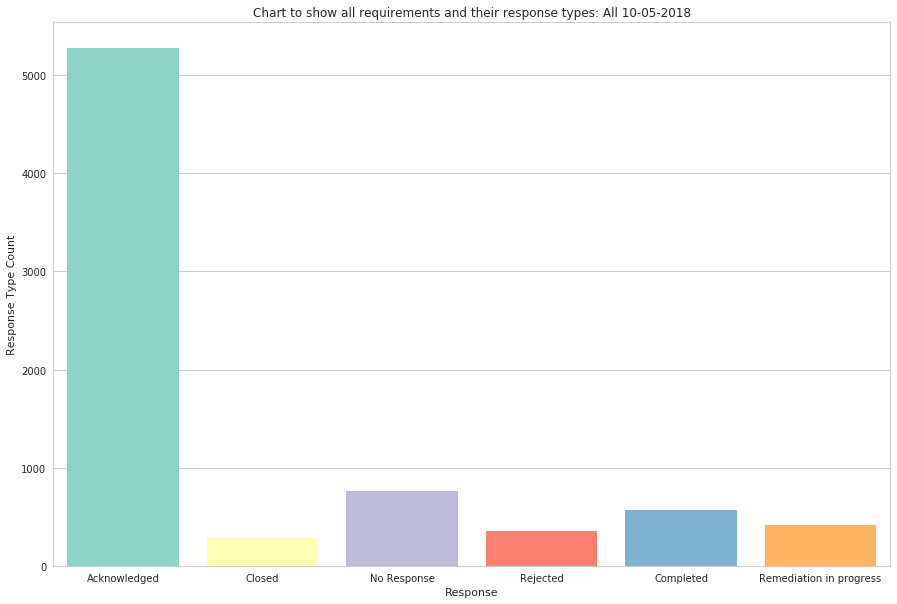

In [167]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Response', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all requirements and their response types: "+PRACTICE+" "+today)

In [168]:
fig.savefig("../"+PRACTICE+"-fig-"+today+".png")

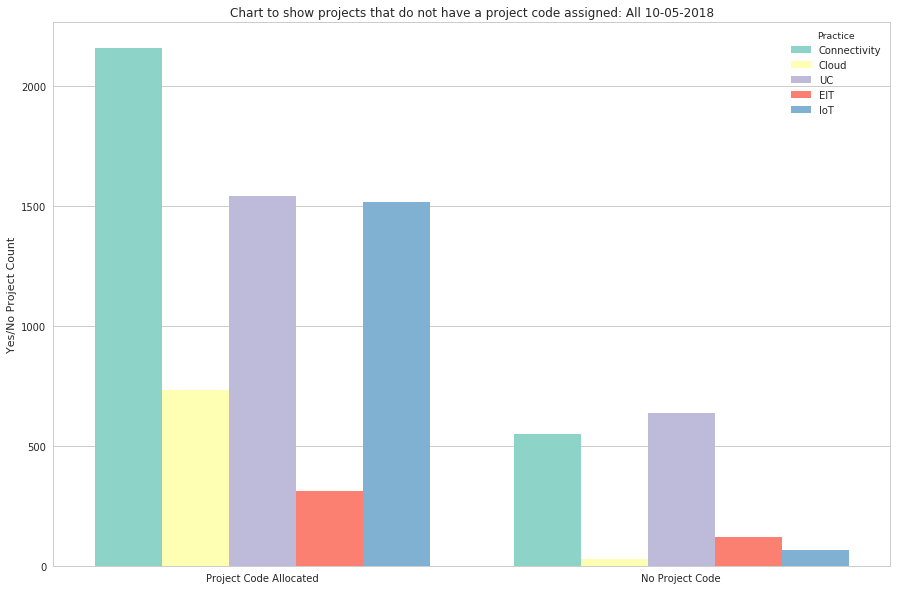

In [169]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Orphan', hue='Practice',saturation=1, palette='Set3')
ax.set_ylabel("Yes/No Project Count")
ax.set_xlabel("")
ax.set_title("Chart to show projects that do not have a project code assigned: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-project-codes-fig-"+today+".png")

In [170]:
out_df[out_df['Practice']=='Unknown Practice']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA


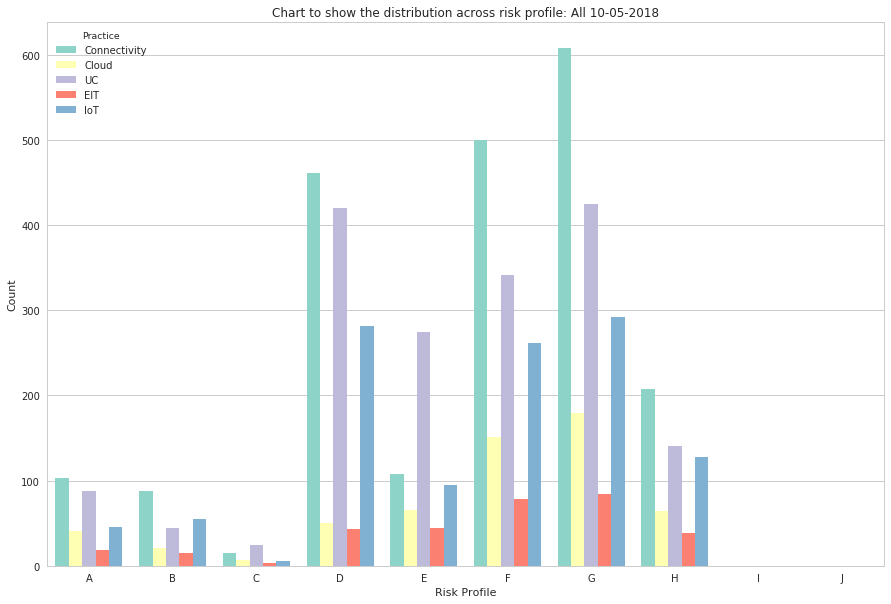

In [171]:
#out_df[out_df['Category']=='PCA']['Risk Category'].value_counts(dropna=False,sort=False)

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df[out_df['Category']=='PCA'], ax=ax, x='Risk Category', 
                   hue='Practice',saturation=1, palette='Set3',
                   order=['A','B','C','D','E','F','G','H','I','J'])
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-risk-cats-fig-"+today+".png")

In [172]:
#pd.get_dummies(out_df['Response'])
out_df['Response'].value_counts()

Acknowledged               5276
No Response                 764
Completed                   568
Remediation in progress     411
Rejected                    354
Closed                      286
Name: Response, dtype: int64

In [173]:
COLUMNS = {'PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC'}

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

req_content = ['']
vertical = [15, ]

uc_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)


In [174]:
uc_risk_df

,PRIVACY_REQUIREMENT_CONTENT,VERTICAL,NC,HYBRID,PC,REQ_NO,HORIZONTAL
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
